### Imported usefull Library for this Use Case

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.getcwd()
os.chdir('F:/dt')

### DataSet imported from data source

In [2]:
DataFrame=pd.read_csv('titanic1.csv')

In [3]:
DataFrame.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [5]:
DataFrame.shape

(1309, 12)

### To print number of male and female

In [6]:
print("total_females=",len(DataFrame[(DataFrame["Sex"]=="female")].index))

total_females= 466


In [7]:
print("total_males=",len(DataFrame[(DataFrame['Sex']=='male')].index))

total_males= 843


In [8]:
DataFrame['Name'].nunique()

1307

### Survived how many male and female

In [9]:
survived=DataFrame[(DataFrame['Sex']=='male') & (DataFrame['Survived']==1)]
len(survived.index)

109

In [10]:
survived=DataFrame[(DataFrame['Sex']=='female') & (DataFrame['Survived']==1)]
len(survived.index)

385

In [11]:
print([DataFrame.groupby('Sex')['Survived'].value_counts(normalize=True)])

[Sex     Survived
female  1           0.82618
        0           0.17382
male    0           0.87070
        1           0.12930
Name: Survived, dtype: float64]


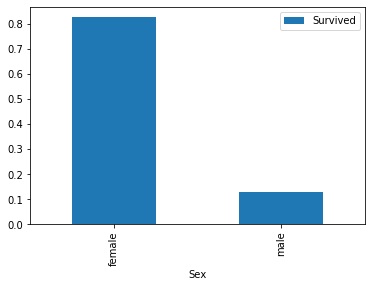

In [12]:
class_pivot=DataFrame.pivot_table(index='Sex',values='Survived')
class_pivot.plot.bar()
plt.show()

### Survival based on passenger class

In [13]:
total_pclass=DataFrame['Pclass'].value_counts().sort_index()
print(total_pclass)

1    323
2    277
3    709
Name: Pclass, dtype: int64


In [14]:
survived_class=[DataFrame.groupby("Pclass")['Survived'].sum()]
survived_class

[Pclass
 1    186
 2    117
 3    191
 Name: Survived, dtype: int64]

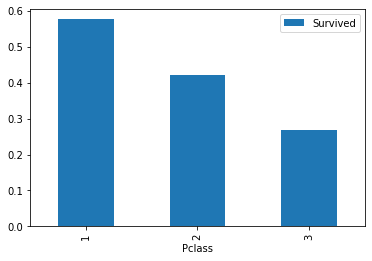

In [15]:
class_pivot=DataFrame.pivot_table(index='Pclass',values="Survived")
class_pivot.plot.bar()
plt.show()

In [16]:
correlation_matrix=DataFrame.corr(method='pearson')
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


In [17]:
print([DataFrame.groupby("Pclass")["Survived"].value_counts(normalize=True)])

[Pclass  Survived
1       1           0.575851
        0           0.424149
2       0           0.577617
        1           0.422383
3       0           0.730606
        1           0.269394
Name: Survived, dtype: float64]


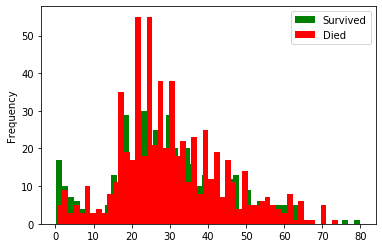

In [18]:
Survived=DataFrame[DataFrame['Survived']==1]
Died=DataFrame[DataFrame['Survived']==0]
Survived['Age'].plot.hist(color='green',bins=50)
Died['Age'].plot.hist(color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [19]:
DataFrame_copy=DataFrame

In [20]:
DataFrame_copy['Fare'].isnull().sum()

1

In [21]:
DataFrame_copy['Age'].fillna(DataFrame_copy['Age'].mean(),inplace=True)

In [22]:
DataFrame_copy.shape

(1309, 12)

In [23]:
DataFrame_copy.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [24]:
df=DataFrame_copy[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [25]:
df=df.dropna(subset=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,29.881138,0,0,8.0500,S
1305,1,1,female,39.000000,0,0,108.9000,C
1306,0,3,male,38.500000,0,0,7.2500,S
1307,0,3,male,29.881138,0,0,8.0500,S


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
df['Embarked']=le.fit_transform(df['Embarked'])
df['Sex']=le.fit_transform(df['Sex'])

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
1304,0,3,1,29.881138,0,0,8.0500,2
1305,1,1,0,39.000000,0,0,108.9000,0
1306,0,3,1,38.500000,0,0,7.2500,2
1307,0,3,1,29.881138,0,0,8.0500,2


In [31]:
df['Age'] = df['Age'].abs()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 8 columns):
Survived    1306 non-null int64
Pclass      1306 non-null int64
Sex         1306 non-null int32
Age         1306 non-null float64
SibSp       1306 non-null int64
Parch       1306 non-null int64
Fare        1306 non-null float64
Embarked    1306 non-null int32
dtypes: float64(2), int32(2), int64(4)
memory usage: 81.6 KB


In [32]:
feature = df[['Pclass','Sex','Age','SibSp','Fare','Embarked']]

In [33]:
target=df['Survived']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.25,random_state=0)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
model=DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [39]:
model.score(x_test,y_test)

0.8318042813455657

In [40]:
b=model.predict(feature)

In [41]:
df['result']=b

In [50]:
df['Sex'].replace({1:'Male',0:'Female'},inplace=True)

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,result
0,0,3,Male,22.000000,1,0,7.2500,2,0
1,1,1,Female,38.000000,1,0,71.2833,0,1
2,1,3,Female,26.000000,0,0,7.9250,2,1
3,1,1,Female,35.000000,1,0,53.1000,2,1
4,0,3,Male,35.000000,0,0,8.0500,2,0
...,...,...,...,...,...,...,...,...,...
1304,0,3,Male,29.881138,0,0,8.0500,2,0
1305,1,1,Female,39.000000,0,0,108.9000,0,1
1306,0,3,Male,38.500000,0,0,7.2500,2,0
1307,0,3,Male,29.881138,0,0,8.0500,2,0


In [59]:
df['result'].sum()

470

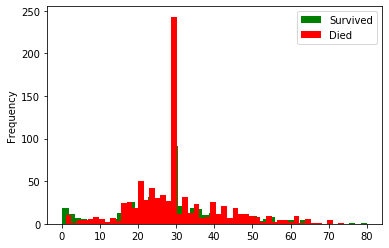

In [65]:
Survived=df[df['result']==1]
Died=df[df['result']==0]
Survived['Age'].plot.hist(color='green',bins=50)
Died['Age'].plot.hist(color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

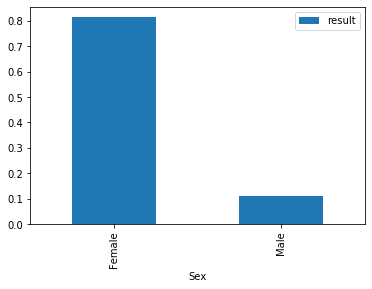

In [66]:
class_pivot=df.pivot_table(index='Sex',values='result')
class_pivot.plot.bar()
plt.show()

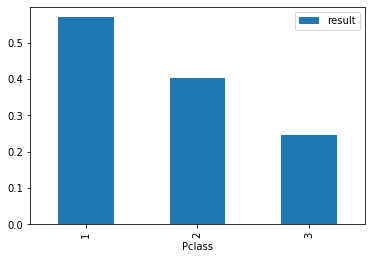

In [77]:
class_pivot=df.pivot_table(index='Pclass',values="result")
class_pivot.plot.bar()
plt.show()

In [79]:
print([df.groupby('Sex')['result'].value_counts(normalize=True)])

[Sex     result
Female  1         0.814655
        0         0.185345
Male    0         0.890736
        1         0.109264
Name: result, dtype: float64]


In [81]:
survived=df[(df['Sex']=='Male') & (df['result']==1)]
len(survived.index)

92

In [82]:
survived=df[(df['Sex']=='Female') & (df['result']==1)]
len(survived.index)

378

## As per prediction below result

In [67]:
survived_class=[df.groupby("Pclass")['result'].sum()]
survived_class

[Pclass
 1    183
 2    112
 3    175
 Name: result, dtype: int64]

Male Survived =92
Female Survived=378

In [290]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(min_samples_split=70, min_samples_leaf=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8532110091743119

In [291]:
model.predict(feature)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [292]:
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predicted)

0.8532110091743119

In [293]:
from sklearn.metrics import recall_score
recall_score(y_test,y_predicted)

0.7716535433070866

In [294]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predicted)

0.8376068376068376

In [295]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_predicted=model.predict(x_test)
cm=confusion_matrix(y_test,y_predicted)

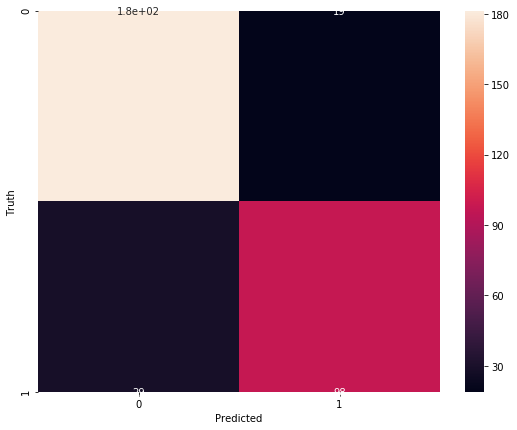

In [297]:
import seaborn as sns
plt.figure(figsize=(9,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()